# Common Lookup Hashing Distribution

In this notebook, we will study three common lookup hashing fuction.

* Bernstein hash
* Modified Bernstein
* Somewhat mixture of the above two

You can look up detail to the first in this [blog](https://eternallyconfuzzled.com/hashing-c-introduction-to-hashing/), and the thrid one is somewhat a mix of the first two, and is explained in detail in this [stackoverflow page](https://stackoverflow.com/questions/263400/what-is-the-best-algorithm-for-overriding-gethashcode)

To make things concrete, we need contex. Suppose we are writing __GetHashCode__ of a class, and 3 fields hash are used to generate the new class instance hash.

Hence, the overall setup is like this,
$$hash = h(field1, field2, field3)$$
We plug in randon int value for the fields and get the distribution of the result hash for each hash function.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Bernstein hash

In [93]:
upper_bound = 1000000

In [94]:
def bernstein_hash(field1, field2, field3):
    h = 0
    h = 33*h + field1
    h = 33*h + field2
    h = 33*h + field3
    return h

In [95]:
def get_hash_values(hash_function):
    random.seed(None)
    res = []
    for i in range((int)(upper_bound)):
        r = random.sample(range(upper_bound), k=3)
        res.append(hash_function(r[0], r[1], r[2]))
    return res

In [96]:
def plot_hist(hash_vales):
    plt.hist(hash_vales, bins=50);

In [97]:
hash_values = get_hash_values(bernstein_hash)

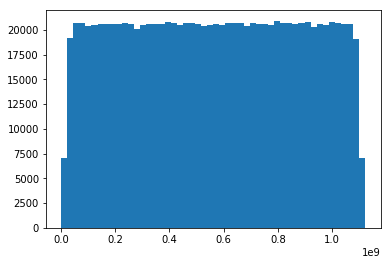

In [98]:
plot_hist(hash_values)

The distribution is not bad, let's count how many collision we have in the result.

In [99]:
def count_collision(hash_values):
    count = 0;
    hash_values.sort()
    previous = -1
    for hv in hash_values:
        if hv == previous:
            count += 1
        previous = hv
    return count

In [100]:
count_collision(hash_values)

448

448 out of one million, that is not bad. Let's check how other hash fuction look like.

## Modified Bernstein

In [109]:
def modified_bernstein(field1, field2, field3):
    h = 0
    h = 33*h ^ field1
    h = 33*h ^ field2
    h = 33*h ^ field3
    return h

In [110]:
mb_hash_values = get_hash_values(modified_bernstein)

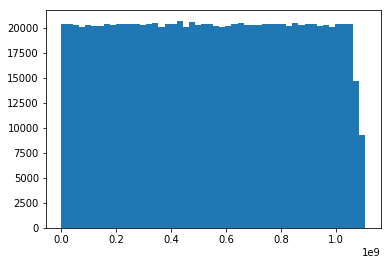

In [111]:
plot_hist(mb_hash_values)

In [112]:
count_collision(mb_hash_values)

458

Distribution wise, the modifid bernstein have better distribution over lower hash value, but the collision cout is simullar the original one.

## Mixture over the above two

This solution is suggest by Jon Skeet, let's see how it work out.

In [114]:
def further_modified_bernstein(field1, field2, field3):
    h = 17
    h = 23*h + field1
    h = 23*h + field2
    h = 23*h + field3
    return h

In [115]:
fmb_hash_values = get_hash_values(further_modified_bernstein)

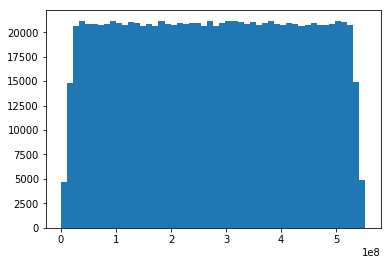

In [116]:
plot_hist(fmb_hash_values)

In [117]:
count_collision(fmb_hash_values)

897

Oh, this is out not I thought to be, let's make make the sample larger and compare them.

## Compare

In [119]:
upper_bound = 3000000

In [120]:
count_collision(get_hash_values(bernstein_hash))

1341

In [121]:
count_collision(get_hash_values(modified_bernstein))

1372

In [122]:
count_collision(get_hash_values(further_modified_bernstein))

2822